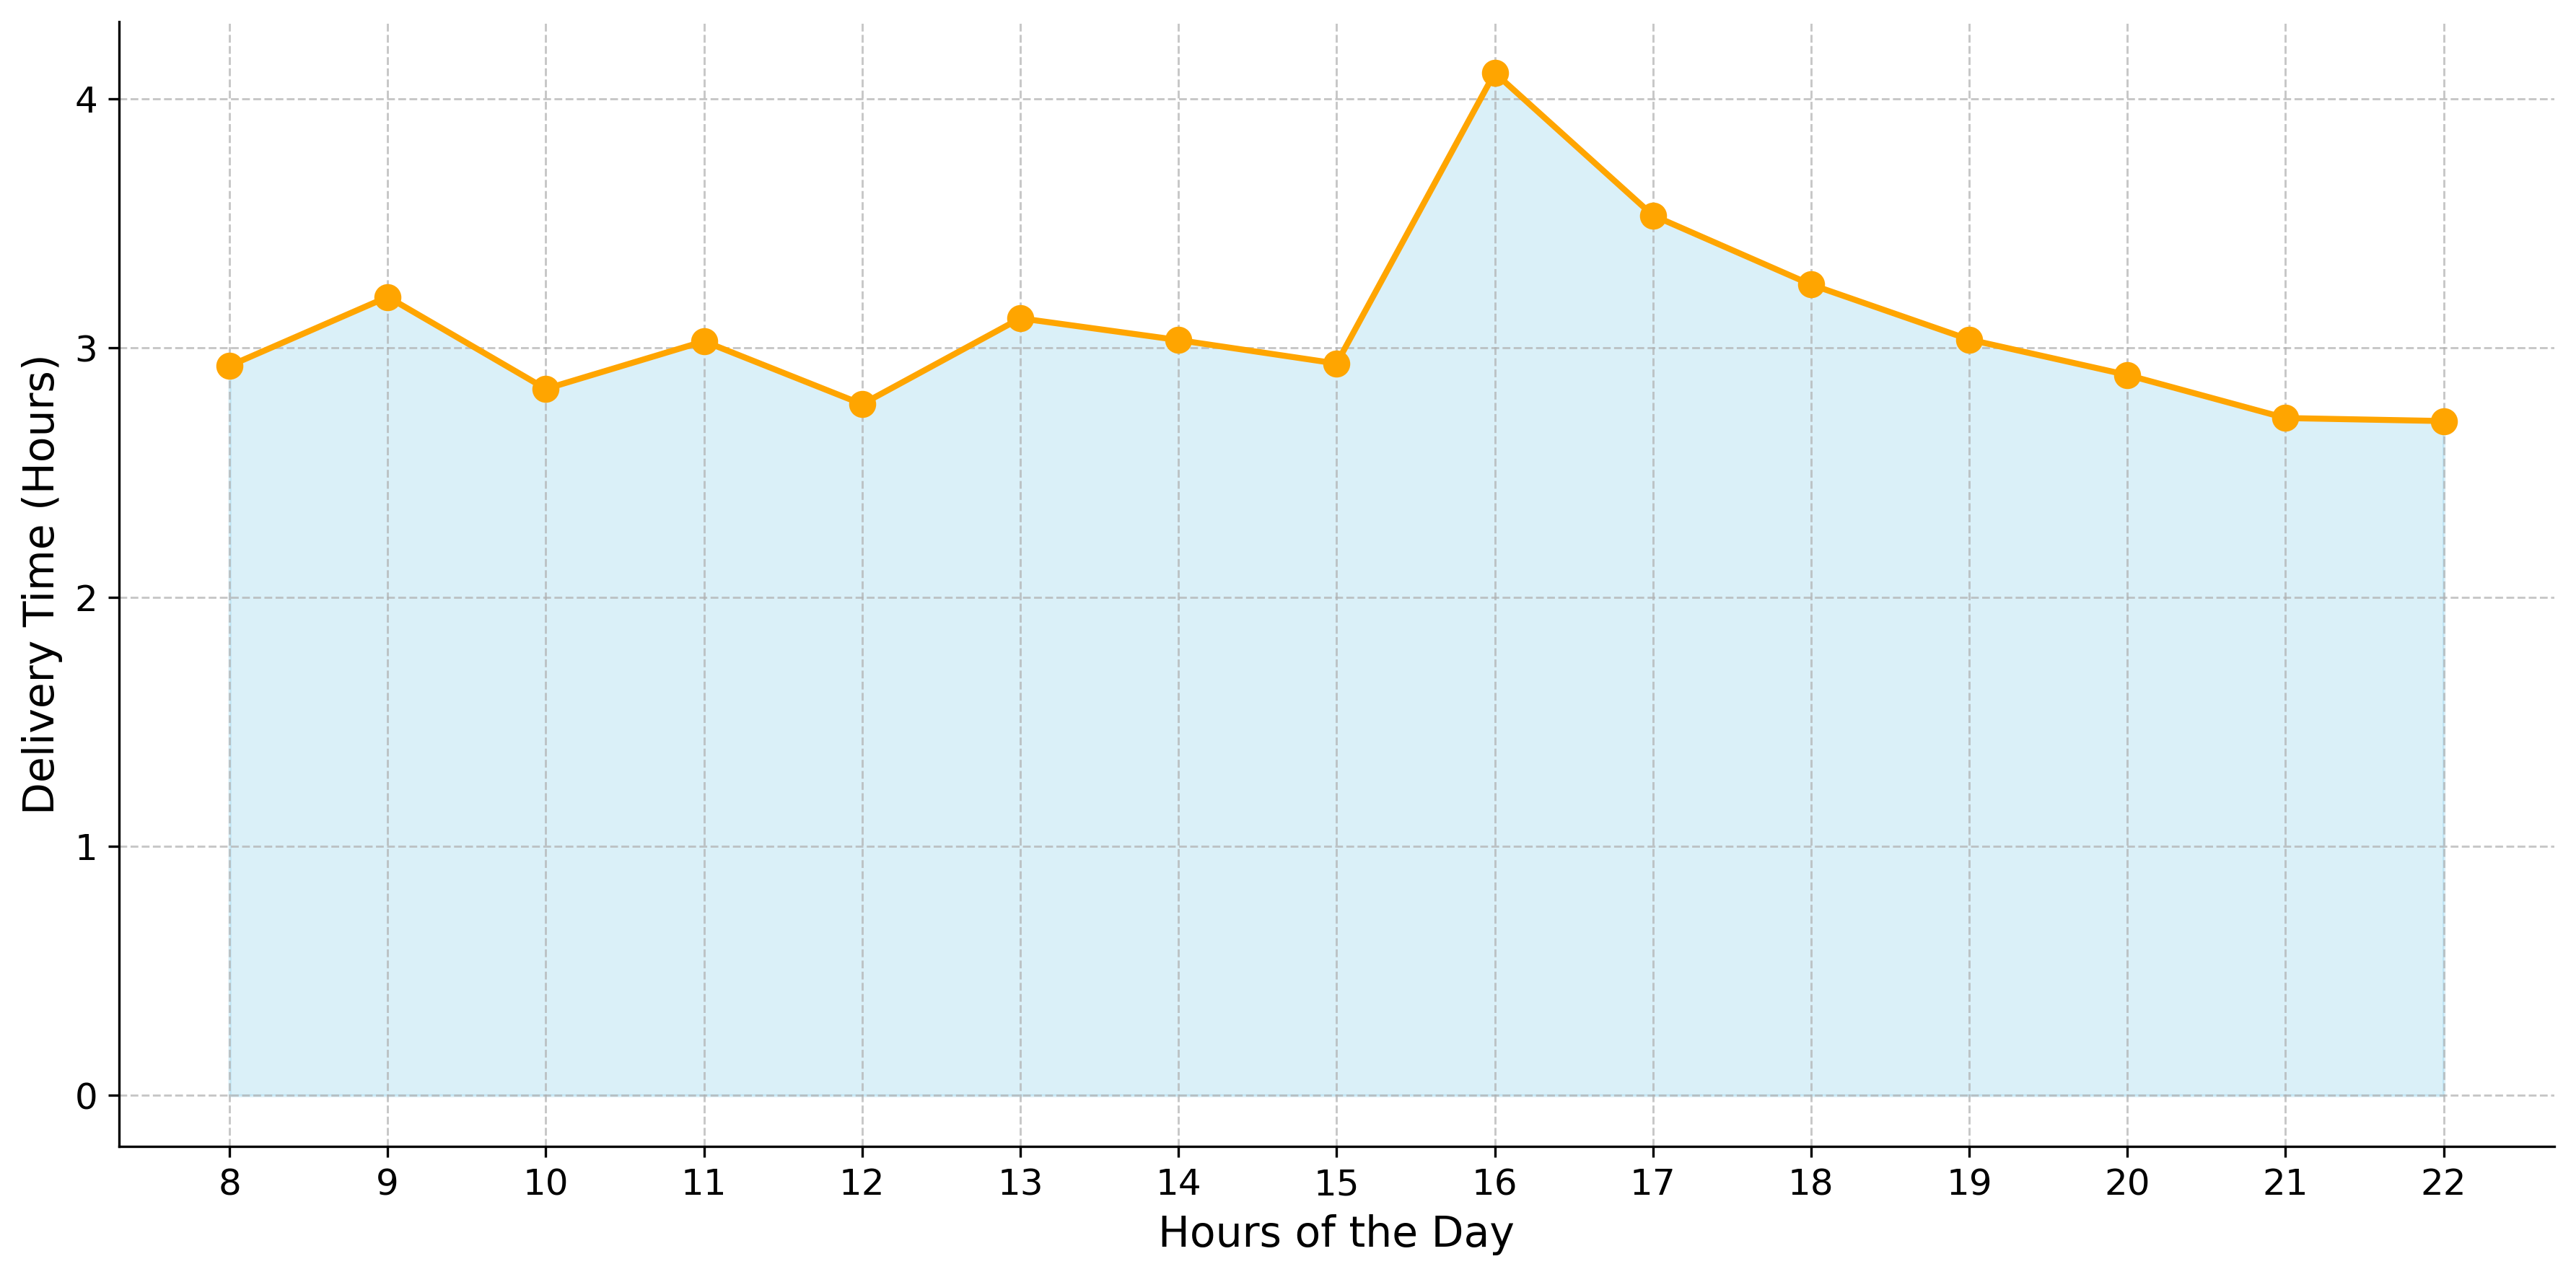

In [2]:
import os
import logging
import pandas as pd
from typing import List
from matplotlib import pyplot as plt

def mean_values(data: pd.DataFrame, column: str) -> float:
    """Calculate the mean value of a specified column in a DataFrame."""
    if column not in data.columns:
        raise KeyError(f"Column '{column}' not found.")
    return data[column].mean()

def load_and_check_file(file_path: str) -> pd.DataFrame:
    """Load a CSV file and perform basic checks."""
    if not os.path.exists(file_path):
        raise FileNotFoundError(f"File not found: {file_path}")

    try:
        data = pd.read_csv(file_path, encoding='utf-8')
    except UnicodeDecodeError:
        data = pd.read_csv(file_path, encoding='ISO-8859-1')

    data.columns = data.columns.str.strip()  # Clean column names
    return data

def load_and_extract_mean(file_path: str, column: str) -> float:
    """Load a CSV file and extract the mean value of a specific column."""
    data = load_and_check_file(file_path)
    return mean_values(data, column)


def plot_delivery_times(hours: List[int], delivery_times: List[float]) -> None:
    """Create a plot for delivery times over different hours."""
    plt.figure(figsize=(12, 6), dpi=300)
    plt.plot(hours, delivery_times, marker='o', markersize=8, linewidth=2,color='orange')
    plt.fill_between(hours, delivery_times, color='skyblue', alpha=0.3)

    # Customizations for beauty
    # plt.title("Delivery Times over Hours of the Day", fontsize=14, weight='bold', pad=15)
    plt.xlabel("Hours of the Day", fontsize=14)
    plt.ylabel("Delivery Time (Hours)", fontsize=14)
    plt.xticks(hours, fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(visible=True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)

    """     
    # Highlight peak and low points
    plt.annotate(
        "Peak: 4.16", xy=(16, 4.16), xytext=(14.5, 4.5),
        arrowprops=dict(arrowstyle='->', lw=1.5), fontsize=12, color='darkblue'
    )
    plt.annotate(
        "Low: 2.82", xy=(13, 2.82), xytext=(12, 2.4),
        arrowprops=dict(arrowstyle='->', lw=1.5), fontsize=12, color='darkgreen'
    ) 
    """

    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    
    plt.tight_layout()
    plt.show()


def main():
    """Main function to load data, process it, and generate the plot."""
    hours = list(range(8, 23))
    file_paths = [f'Output_{hour}.csv' for hour in hours]
    column_name = 'Total_delivery_times_optimize'
    delivery_times = []

    for file in file_paths:
        try:
            mean_value = load_and_extract_mean(file, column_name)
            delivery_times.append(mean_value)
        except (FileNotFoundError, KeyError) as e:
            delivery_times.append(None)

    valid_hours = [h for h, t in zip(hours, delivery_times) if t is not None]
    valid_times = [t for t in delivery_times if t is not None]

    df = pd.DataFrame({'Hours': valid_hours, 'Delivery_times': valid_times})
    df.to_csv('PS_Delivery_times.csv', index=False)

    if valid_hours:
        plot_delivery_times(valid_hours, valid_times)
    else:
        print("Error: No valid data to plot.")


if __name__ == "__main__":
    main()

